# Restructuring Data

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [82]:
df = pd.read_csv("Data//fivepoints.csv", sep=';', low_memory=False, encoding='ISO-8859-1')

In [83]:
df.sample(10)

,primary,idll_vo3lv,name,value
1058743,1059140,9551,timestampsm,3886
785330,785727,8081,statuscl,NaN
219103,219164,9373,timestampsm,2421
693096,693493,3814,patternsm,"0,1,1,0,0,0,0,1"
94802,94863,5166,statuscl,"1,1,1"
308,369,8874,statuscl,"1,1"
438851,439248,5652,timestampload,1593590343193
889535,889932,9990,timestampload,1601982522968
887601,887998,6348,numbercl,"3,6"
131080,131141,2156,timestampcl,"1589962939739,1589962941265"


The dataset is not structured in a way where each row represents a single shape a student has made. In this section, we will analyze the necessary elements to restructure the dataset to the form we will need.

In [84]:
if df['primary'].nunique() == df.shape[0]:
    print("All values in 'primary' are different.")

All values in 'primary' are different.


In [85]:
if df['idll_vo3lv'].nunique() == df.shape[0]:
    print("All values in 'student id' are different.")
else:
    print("no")

no


From this result, we can conclude the column 'primary' represents the primary key and thus they are different in each row, and 'idll_vo3lv' represents the student's id and thus they are not different in each row.

In [86]:
df.dtypes

primary        int64
idll_vo3lv     int64
name          object
value         object
dtype: object

In [87]:
df['name'].unique()

array(['patternsm', 'timestampsm', 'statuscl', 'numbercl', 'timestampcl',
       'timestampload'], dtype=object)

There are 5 unique values in the column 'name'. These values are categories that represent a single shape that a student has made, and thus they will represent the new columns in the restructured dataset. The columns of the restructured dataset will look like this:

In [88]:
restructured_columns = {
    'student_id': [],
    'patternsm': [],
    'statuscl': [],
    'numbercl': [],
    'timestampcl': [],
    'timestampload': [],
    'timestampsm': [],
    'primary_keys': []
}

In order to improve the speed of my restructuring algorithm, we have sorted the the dataset by the student id in an ascending order, so the test results of each students will be grouped closer to each other, and the algorithm does not have to iterate the whole dataset per loop turn.

In [89]:
sorted_df = df.sort_values(by=['idll_vo3lv'], ascending=True)

The code block below is the algorithm we created to restructure the dataset.

In [90]:
student_ids = df['idll_vo3lv'].unique() 

for studentid in student_ids:
    results = df[df['idll_vo3lv'] == studentid]   
    sorted_results = results.sort_values(by=['primary'], ascending=True)

    # Values
    primary_keys = []
    patternsm = None
    statuscl = None
    numbercl = None
    timestampcl = None
    timestampload = None
    timestampsm = None
    i = 0 

    for _, row in sorted_results.iterrows():

        if row['name'] == 'patternsm':
            patternsm = row['value']
        elif row['name'] == 'statuscl':
            statuscl = row['value']
        elif row['name'] == 'numbercl':
            numbercl = row['value']
        elif row['name'] == 'timestampcl':
            timestampcl = row['value']
        elif row['name'] == 'timestampload':
            timestampload = row['value']
        elif row['name'] == 'timestampsm':
            timestampsm = row['value']
        else: 
            print(f"{row['primary']} has {row['name']}, and it failed")
        
        primary_keys.append(row['primary'])

        # When complete, add the values to the column
        if i == 5:
            new_row = {
                'student_id': studentid,
                'patternsm': patternsm,
                'statuscl': statuscl,
                'numbercl': numbercl,
                'timestampcl': timestampcl,
                'timestampload': timestampload,
                'timestampsm': timestampsm,
                'primary_keys': primary_keys
            }
            for key, value in new_row.items():
                restructured_columns[key].append(value)
            primary_keys = []
            i = 0   
        else:
            i += 1         

df = pd.DataFrame(restructured_columns)

# Data cleaning

In [91]:
dfEindtoets = pd.read_csv('Data/eindtoets.csv', sep=";")

In [92]:
# Convert timestampload to float
df['timestampload'] = df['timestampload'].astype(float)

# timestampload * 1.0
df['timestampload'] = df['timestampload'] * 1.0

# Sort by timestampload
df = df.sort_values(by='timestampsm', ascending=True)

# Display format
pd.options.display.float_format = '{:.0f}'.format

df.head()

,student_id,patternsm,statuscl,numbercl,timestampcl,timestampload,timestampsm,primary_keys
3747,7125,"0,0,0,0,0,0,0,0",NaN,NaN,NaN,1583834757753,100,"[22267, 22268, 22269, 22270, 22271, 22272]"
19595,4266,"0,0,0,0,0,0,0,0",NaN,NaN,NaN,1584104574981,100,"[117145, 117146, 117147, 117148, 117149, 117150]"
145792,1842,"0,0,0,1,0,0,0,0",1,4,1601887539874,1601887539407,1000,"[875029, 875030, 875031, 875032, 875033, 875034]"
117830,4199,"0,0,0,0,0,1,0,0",1,6,1600933709687,1600933709240,1000,"[709099, 709100, 709101, 709102, 709104, 709106]"
11478,2440,"0,0,0,0,0,0,0,0",NaN,NaN,NaN,1584009399543,1000,"[68371, 68372, 68373, 68374, 68375, 68376]"


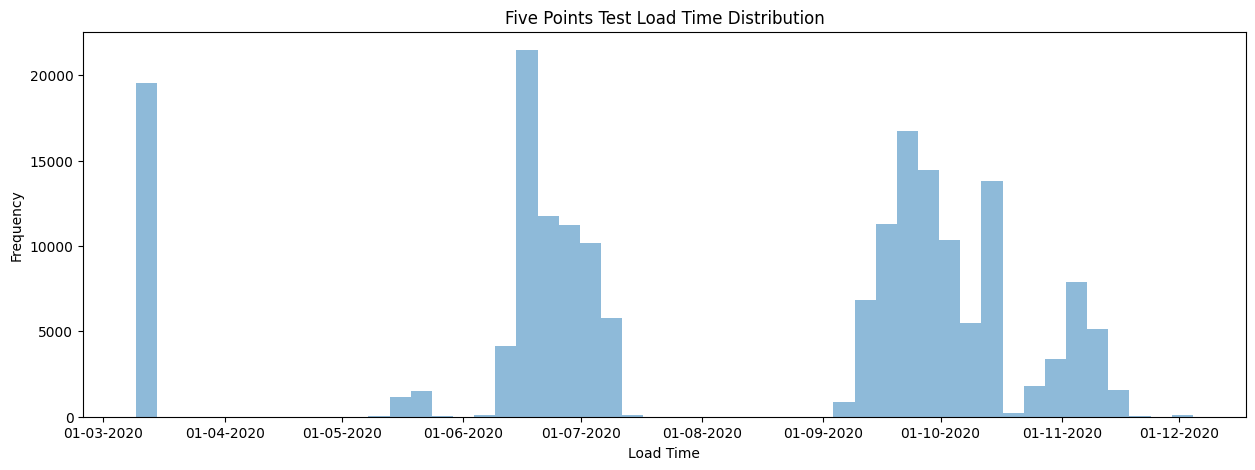

In [93]:
dfWithTime = df.copy()

# Convert the timestamp integers to datetime objects
dfWithTime['datetime'] = pd.to_datetime(dfWithTime['timestampload'], unit='ms')

# Create the histogram plot with a wider figure size
fig, ax = plt.subplots(figsize=(15, 5))  # Adjust width as needed
ax.hist(dfWithTime['datetime'], bins=50, alpha=0.5)

# Set x-axis tick labels to show only 5 datetime values
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.title('Five Points Test Load Time Distribution')
plt.xlabel('Load Time')
plt.ylabel('Frequency')
plt.show()

The first tests were taken the March 9th and ended Decembre the 4th.

In [94]:
# Sort by timestampsm
dfWithTime = dfWithTime.sort_values(by='timestampsm', ascending=True)

dfWithTime.head()

,student_id,patternsm,statuscl,numbercl,timestampcl,timestampload,timestampsm,primary_keys,datetime
3747,7125,"0,0,0,0,0,0,0,0",NaN,NaN,NaN,1583834757753,100,"[22267, 22268, 22269, 22270, 22271, 22272]",2020-03-10 10:05:57.753
19595,4266,"0,0,0,0,0,0,0,0",NaN,NaN,NaN,1584104574981,100,"[117145, 117146, 117147, 117148, 117149, 117150]",2020-03-13 13:02:54.981
47850,9717,"0,0,0,1,0,0,0,0",1,4,1592580269526,1592580268869,1000,"[287611, 287612, 287613, 287614, 287615, 287616]",2020-06-19 15:24:28.869
54250,9666,"0,0,0,0,0,1,0,0",1,6,1592915521455,1592915520916,1000,"[324781, 324782, 324783, 324784, 324785, 324786]",2020-06-23 12:32:00.916
176898,5927,"0,0,0,0,0,0,1,0",1,7,1604660297308,1604660296850,1000,"[1061821, 1061822, 1061823, 1061824, 1061825, ...",2020-11-06 10:58:16.850


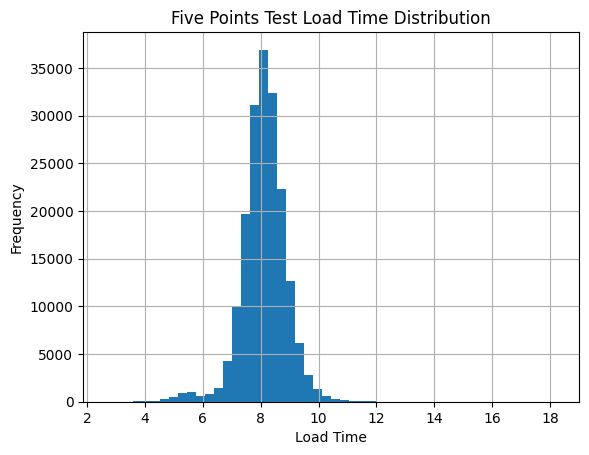

In [95]:
# To float
df['timestampsm'] = df['timestampsm'].astype(float)

# Log scale
df['timestampsmlog'] = df['timestampsm'].apply(lambda x: np.log(x))

# Make a histogram of the timestampsm column
df['timestampsmlog'].hist(bins=50)

# X-axis label
plt.xlabel('Load Time')
plt.ylabel('Frequency')
plt.title('Five Points Test Load Time Distribution')

df.drop('timestampsmlog', axis=1, inplace=True)

<Axes: >

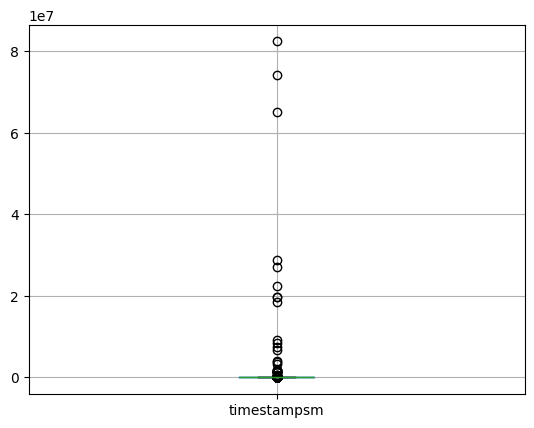

In [96]:
# Boxplot timestampsm
df.boxplot(column=['timestampsm'])

In [97]:
# Amount unique student id
print('Amount of unique student id in eindtoets:', len(df['student_id'].unique()))

Amount of unique student id in eindtoets: 4550


In [98]:
# Cleaning data
dfEindtoets['cito'] = dfEindtoets['cito'].replace('', pd.NA).astype('Int64')
dfEindtoets['schooljaar'] = dfEindtoets['schooljaar'].replace('', pd.NA)
dfEindtoets['gender'] = dfEindtoets['gender'].replace('', pd.NA).astype('Int64')

# Filtering rows
filtered_df = dfEindtoets.dropna(subset=['cito', 'school', 'gender'])

# Output
print(filtered_df[['idll_vo3lv', 'cito','school', 'gender']])

      idll_vo3lv  cito   school  gender
1              3   518  vmbo kl       1
4              6   524  vmbo bl       0
6              8   529  vmbo bl       1
9             11   533  vmbo kl       0
11            13   534  vmbo kl       0
...          ...   ...      ...     ...
4227        9638   549      vwo       1
4228        9640   543      vwo       0
4231        9649   543      vwo       1
4232        9656   543      vwo       0
4234        9663   545      vwo       0

[2214 rows x 4 columns]


In [99]:
# Print unique values for student_id for Eindtoets as a list
print('Unique student_id in Eindtoets:', sorted(dfEindtoets['idll_vo3lv'].unique().tolist()))

# Print unique values for student_id for FivePoints as a list and sort them
print('Unique student_id in FivePoints:', sorted(df['student_id'].unique().tolist()))

# Check how many students are different in both datasets
print('Students that are in Eindtoets but not in FivePoints:', len(set(dfEindtoets['idll_vo3lv'].unique()) - set(df['student_id'].unique())))

# viceversa
print('Students that are in FivePoints but not in Eindtoets:', len(set(df['student_id'].unique()) - set(dfEindtoets['idll_vo3lv'].unique())))

Unique student_id in Eindtoets: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 21, 25, 26, 29, 30, 32, 33, 35, 36, 37, 39, 40, 41, 45, 49, 51, 54, 55, 56, 58, 64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 77, 79, 80, 81, 82, 83, 85, 86, 87, 95, 101, 103, 105, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119, 121, 122, 123, 127, 129, 130, 131, 132, 133, 135, 136, 140, 141, 145, 146, 150, 158, 159, 160, 163, 172, 175, 176, 178, 179, 180, 185, 187, 191, 196, 200, 204, 206, 208, 209, 210, 211, 212, 214, 218, 222, 224, 227, 228, 230, 235, 236, 237, 239, 243, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 258, 260, 261, 264, 266, 268, 273, 274, 275, 277, 279, 280, 281, 282, 284, 288, 293, 296, 297, 298, 300, 301, 304, 305, 306, 309, 310, 312, 313, 316, 317, 320, 323, 326, 329, 330, 332, 335, 336, 341, 343, 344, 345, 347, 348, 349, 352, 353, 354, 356, 357, 359, 361, 362, 364, 373, 376, 378, 379, 382, 383, 385, 386, 387, 395, 396, 398, 401, 402, 403, 404, 406, 409, 410, 413, 414, 417, 418, 

In [100]:
# Make a new dataframe, containing unique values from the FivePoints dataset
dfStudents = df.drop_duplicates(subset=['student_id'])

# Keep only student_id
dfStudents = dfStudents[['student_id']]

# sort by student_id
dfStudents = dfStudents.sort_values(by='student_id')

# Merge cito and school columns from Eindtoets to the new dataframe
dfStudents = dfStudents.merge(dfEindtoets[['idll_vo3lv', 'cito', 'school']], left_on='student_id', right_on='idll_vo3lv', how='left')

# drop idll_vo3lv column
dfStudents = dfStudents.drop('idll_vo3lv', axis=1)

# Print how many NaN values for School
print('NaN values for School:', dfStudents['school'].isnull().sum())

# Print how many NaN values for Cito
print('NaN values for Cito:', dfStudents['cito'].isnull().sum())

dfStudents.head(20)

NaN values for School: 314
NaN values for Cito: 2279


,student_id,cito,school
0,1,<NA>,NaN
1,2,<NA>,vmbo kl
2,3,518,vmbo kl
3,4,<NA>,vmbo kl
4,5,<NA>,vmbo kl
5,6,524,vmbo bl
6,7,<NA>,vmbo kl
7,8,529,vmbo bl
8,9,<NA>,vmbo kl
9,10,<NA>,vmbo kl


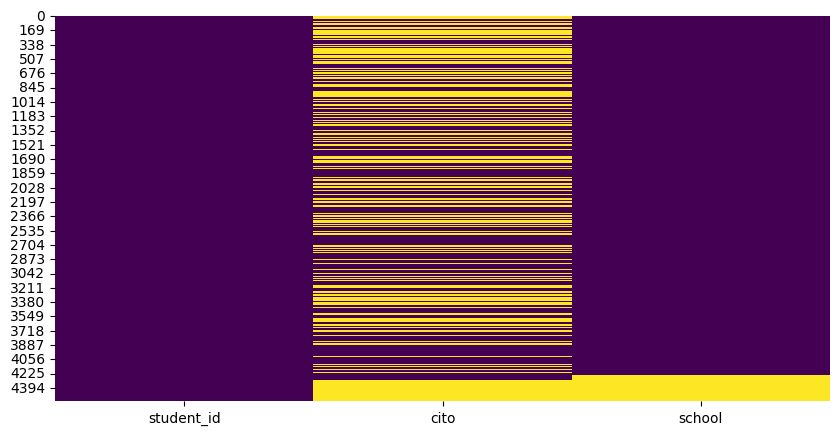

In [101]:
plt.figure(figsize=(10, 5))
sns.heatmap(dfStudents.isnull(), cbar=False, cmap='viridis')
plt.show()

In [102]:
df['timestampsubmission'] = df['timestampsm'] + df['timestampload']

In [103]:
filtered_groups = []

for student_id, group in df.groupby('student_id'):
    # Sort the group by timestampload
    group = group.sort_values(by='timestampload', ascending=True)

    # Get the first value of timestampload
    first_timestamp = group['timestampload'].iloc[0]

    # Calculate max_timestamp (180 seconds in milliseconds)
    max_timestamp = first_timestamp + 180000

    # Remove rows where timestampsubmission is greater than max_timestamp
    group = group[group['timestampsubmission'] <= max_timestamp]
    
    # Append the filtered group to the list
    filtered_groups.append(group)

filtered_df = pd.concat(filtered_groups)
final_filtered_groups = []

for student_id, group in filtered_df.groupby('student_id'):
    # Keep only the first occurrence of each timestampload
    group = group.drop_duplicates(subset='timestampload', keep='first')
    final_filtered_groups.append(group)

filtered_df = pd.concat(final_filtered_groups)

print(filtered_df)

        student_id        patternsm         statuscl         numbercl  \
0                1  0,0,1,0,0,0,1,0              1,1              3,7   
1                1  1,1,0,0,0,0,0,0              1,1              2,1   
2                1  0,0,1,1,0,0,0,0              1,1              3,4   
3                1  0,0,0,0,0,1,0,1              1,1              8,6   
4                1  0,0,1,1,0,0,0,0              1,1              4,3   
...            ...              ...              ...              ...   
186950       10058  0,0,1,1,0,0,1,1          1,1,1,1          4,8,7,3   
186951       10058  1,1,0,0,1,1,0,0          1,1,1,1          1,5,6,2   
186952       10058  1,0,0,1,1,1,0,0          1,1,1,1          1,6,5,4   
186953       10058  1,1,0,1,1,1,1,0  1,0,1,1,1,1,1,1  1,1,1,5,6,2,7,4   
186954       10058  1,1,1,1,0,0,1,1      1,1,1,1,1,1      4,8,7,3,2,1   

                                              timestampcl  timestampload  \
0                             1583742751461,158

In [104]:
# Add datetime column based no timestampload
filtered_df['datetime'] = pd.to_datetime(filtered_df['timestampload'], unit='ms')

# export as csv
filtered_df.to_csv('./5dots/fivepointsWithDatetime.csv', index=False)

# Remove datetime column
filtered_df = filtered_df.drop('datetime', axis=1)

In [105]:
# Initialize an empty list to store the results
student_pause_data = []

# Iterate through each student
for student_id, group in filtered_df.groupby('student_id'):
    # Sort by timestampload
    group = group.sort_values(by='timestampload', ascending=True)
    
    # Get first value of timestampload
    first_timestamp = group['timestampload'].iloc[0]
    
    # Calculate max timestamp
    timestamp_max = first_timestamp + 180000
    
    # Initialize pause count
    pause_count = 0
    
    # Iterate through each row in the group
    for _, row in group.iterrows():
        # Ensure numbercl is treated as a string
        numbercl_str = str(row['numbercl'])
        
        # Get the amount of clicks
        num_clicks = numbercl_str.count(',') + 1

        # Check if timestampsm is larger than 5000 + 500 * num_clicks
        if row['timestampsm'] > 5000 + 800 * num_clicks:
            pause_count += 1

    # last submission timestamp
    last_submission = group['timestampload'].iloc[-1] + group['timestampsm'].iloc[-1]

    if max_timestamp - last_submission > 10000:
        pause_count += 1
    
    # Append the student_id and pause_count to the results list
    student_pause_data.append({'student_id': student_id, 'pauses': pause_count})

# Create a DataFrame from the results list
student_pause = pd.DataFrame(student_pause_data)

# Display the student_pause DataFrame
print(student_pause)

      student_id  pauses
0              1       1
1              2       6
2              3       1
3              4       2
4              5       1
...          ...     ...
4544       10052       5
4545       10054       1
4546       10055       9
4547       10056       7
4548       10058       0

[4549 rows x 2 columns]


# Data Calculation

In [106]:
df = filtered_df.dropna(subset=['timestampload'])
df.isna().sum()

student_id                0
patternsm                 0
statuscl               7667
numbercl               7667
timestampcl            7667
timestampload             0
timestampsm               0
primary_keys              0
timestampsubmission       0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169796 entries, 0 to 186954
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   student_id           169796 non-null  int64  
 1   patternsm            169796 non-null  object 
 2   statuscl             162129 non-null  object 
 3   numbercl             162129 non-null  object 
 4   timestampcl          162129 non-null  object 
 5   timestampload        169796 non-null  float64
 6   timestampsm          169796 non-null  float64
 7   primary_keys         169796 non-null  object 
 8   timestampsubmission  169796 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 13.0+ MB


Here we use the cleaned up of the csv and as you can see it show each pattern base on the student_id and other additional information.

In [108]:
rows = df['student_id'].value_counts().reset_index()
rows.columns = ['student_id', 'total_patterns']

# Groepeer de rijen op basis van 'student_id' en neem de som van de 'pattern' waar deze gelijk is aan "0,0,0,0,0,0,0,0"
sum_of_pattern = df[df['patternsm'] == "0,0,0,0,0,0,0,0"].groupby('student_id')['patternsm'].count().reset_index()
sum_of_pattern.columns = ['student_id', 'sum_invalid_pattern']

total_duplicates = df.groupby('student_id').size().reset_index()
total_duplicates.columns = ['student_id', 'total_duplicates']

# Voeg de sommen toe aan de oorspronkelijke DataFrame
rows = pd.merge(rows, sum_of_pattern, on='student_id', how='left')

rows

,student_id,total_patterns,sum_invalid_pattern
0,2639,125,74
1,748,111,84
2,69,92,40
3,10042,81,21
4,1161,81,62
...,...,...,...
4544,4860,1,1
4545,1354,1,1
4546,7132,1,1
4547,5874,1,NaN


We decided to make a new csv that has a summed up result of what each student did base on the csv given. As you can see here we get the created 2 new columns where it show the "total_patterns" and "sum_invalid_pattern".
<br>
<br>
The column "total_patterns" means the total pattern/figures made by the student including duplicates and incorrect one's.<br>
The column "sum_invalid_pattern" means the total amount of patterns that were invalid meaning patternsm = '0,0,0,0,0,0,0,0'. So no line was selected

In [109]:
# Filter out rows with 'patternsm' not equal to '0,0,0,0,0,0,0,0'
non_zero_df = df[df['patternsm'] != '0,0,0,0,0,0,0,0']

# Group by 'student_id' and count the unique patterns
unique_patterns_per_student = non_zero_df.groupby('student_id')['patternsm'].nunique().reset_index()
unique_patterns_per_student.columns = ['student_id', 'unique_patterns_count']

# Calculate the total count of values for each student, including zeros
total_values_per_student = df.groupby('student_id')['patternsm'].count().reset_index()
total_values_per_student.columns = ['student_id', 'total_values_count']

# Calculate the total count of values for each student, excluding zeros
total_non_zero_values_per_student = non_zero_df.groupby('student_id')['patternsm'].count().reset_index()
total_non_zero_values_per_student.columns = ['student_id', 'total_non_zero_values_count']

# Merge the DataFrames to create the new DataFrame
new_df = pd.merge(unique_patterns_per_student, total_values_per_student, on='student_id')
new_df = pd.merge(new_df, total_non_zero_values_per_student, on='student_id')

# Calculate the "duplicates" column
new_df['duplicates'] = new_df['total_non_zero_values_count'] - new_df['unique_patterns_count']

new_df.head()

,student_id,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
0,1,4,5,5,1
1,2,25,26,26,1
2,3,35,45,44,9
3,4,51,58,56,5
4,5,45,58,57,12


Here we made a bunch more colums/features such as unique_patterns_count which is how many good patterns they made.
<br>
"total_values_count" shows how many pattern they made including duplicated and incorrect/zero patterns
<br>
"total_non_zero_values_count" is the colums that show all the patterns including the duplicated but excapt the zero/incorrect patterns

In [110]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529 entries, 0 to 4528
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   student_id                   4529 non-null   int64
 1   unique_patterns_count        4529 non-null   int64
 2   total_values_count           4529 non-null   int64
 3   total_non_zero_values_count  4529 non-null   int64
 4   duplicates                   4529 non-null   int64
dtypes: int64(5)
memory usage: 177.0 KB


In [111]:
# combine the DataFrames
combine = pd.merge(rows, new_df, on='student_id', how='left')

combine.head()

,student_id,total_patterns,sum_invalid_pattern,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
0,2639,125,74,14,125,51,37
1,748,111,84,25,111,27,2
2,69,92,40,8,92,52,44
3,10042,81,21,36,81,60,24
4,1161,81,62,17,81,19,2


Here we combine both dataframe but the the total_patterns will be dropped for as it's the same as the total_values_count

In [112]:
combine = combine.drop('total_patterns', axis=1)

In [113]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   4549 non-null   int64  
 1   sum_invalid_pattern          2595 non-null   float64
 2   unique_patterns_count        4529 non-null   float64
 3   total_values_count           4529 non-null   float64
 4   total_non_zero_values_count  4529 non-null   float64
 5   duplicates                   4529 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 213.4 KB


In [114]:
#check student_id 1 in df combine
combine[combine['student_id'] == 1]

,student_id,sum_invalid_pattern,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
4502,1,NaN,4,5,5,1


Here is the example how it would look like for student one but therer is some na fills that needs to be cleaned up.

In [115]:
combine.describe()

,student_id,sum_invalid_pattern,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
count,4549,2595,4529,4529,4529,4529
mean,5219,3,32,37,36,4
std,3035,5,12,13,13,4
min,1,1,1,1,1,0
25%,2619,1,24,29,27,1
50%,5224,2,33,38,36,3
75%,8022,3,40,46,45,5
max,10058,84,69,125,76,63


In [116]:
# check for na values
combine.isna().sum()


student_id                        0
sum_invalid_pattern            1954
unique_patterns_count            20
total_values_count               20
total_non_zero_values_count      20
duplicates                       20
dtype: int64

Here we check all the na values

In [117]:
#show the rows with total_values_count is nan
combine[combine['total_values_count'].isna()]

,student_id,sum_invalid_pattern,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
4495,65,6,NaN,NaN,NaN,NaN
4498,8159,5,NaN,NaN,NaN,NaN
4503,9782,5,NaN,NaN,NaN,NaN
4504,2060,5,NaN,NaN,NaN,NaN
4506,9781,4,NaN,NaN,NaN,NaN
4511,9768,4,NaN,NaN,NaN,NaN
4512,3574,4,NaN,NaN,NaN,NaN
4513,9743,4,NaN,NaN,NaN,NaN
4519,2021,4,NaN,NaN,NaN,NaN
4523,2690,3,NaN,NaN,NaN,NaN


We decided to drop these rows as these are invalid pattern therefore it's not needed

In [118]:
#drop the rows with total_values_count is nan
combine = combine.dropna(subset=['total_values_count'])

combine.describe()

,student_id,sum_invalid_pattern,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
count,4529,2575,4529,4529,4529,4529
mean,5214,3,32,37,36,4
std,3032,5,12,13,13,4
min,1,1,1,1,1,0
25%,2618,1,24,29,27,1
50%,5223,2,33,38,36,3
75%,8009,3,40,46,45,5
max,10058,84,69,125,76,63


In [119]:
#fill sum_invalid_pattern with 0
combine['sum_invalid_pattern'] = combine['sum_invalid_pattern'].fillna(0)

combine.describe()

,student_id,sum_invalid_pattern,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
count,4529,4529,4529,4529,4529,4529
mean,5214,2,32,37,36,4
std,3032,4,12,13,13,4
min,1,0,1,1,1,0
25%,2618,0,24,29,27,1
50%,5223,1,33,38,36,3
75%,8009,2,40,46,45,5
max,10058,84,69,125,76,63


Here we decided to fill in the NaN values for "sum_invalid_pattern", because if they have NaN incorrect value means they made 0 incorrect values

In [120]:
#check student_id 1 in df combine
combine[combine['student_id'] == 1]

,student_id,sum_invalid_pattern,unique_patterns_count,total_values_count,total_non_zero_values_count,duplicates
4502,1,0,4,5,5,1


In [121]:
# check for na values
combine.isna().sum()

student_id                     0
sum_invalid_pattern            0
unique_patterns_count          0
total_values_count             0
total_non_zero_values_count    0
duplicates                     0
dtype: int64

Here is there is no more NaN values left and will be ready to use for creating more features and labeling them

# Data Merge

In [122]:
merged_data = pd.merge(student_pause, combine, on='student_id')

# Introduce new column 'empty_sumbissions' > total_values_count - total_non_zero_values_count
merged_data['empty_submissions'] = merged_data['total_values_count'] - merged_data['total_non_zero_values_count']

# drop column total_non_zero_values_count
merged_data = merged_data.drop(columns=['total_non_zero_values_count'])

print(merged_data.head(50).to_string())

    student_id  pauses  sum_invalid_pattern  unique_patterns_count  total_values_count  duplicates  empty_submissions
0            1       1                    0                      4                   5           1                  0
1            2       6                    0                     25                  26           1                  0
2            3       1                    1                     35                  45           9                  1
3            4       2                    2                     51                  58           5                  2
4            5       1                    1                     45                  58          12                  1
5            6       5                    2                     34                  39           3                  2
6            7       6                    4                     22                  29           3                  4
7            8       8                    0             

In [123]:
merged_data.describe()

,student_id,pauses,sum_invalid_pattern,unique_patterns_count,total_values_count,duplicates,empty_submissions
count,4529,4529,4529,4529,4529,4529,4529
mean,5214,4,2,32,37,4,2
std,3032,2,4,12,13,4,4
min,1,0,0,1,1,0,0
25%,2618,2,0,24,29,1,0
50%,5223,3,1,33,38,3,1
75%,8009,5,2,40,46,5,2
max,10058,18,84,69,125,63,84


In [124]:
merged_data.head()

,student_id,pauses,sum_invalid_pattern,unique_patterns_count,total_values_count,duplicates,empty_submissions
0,1,1,0,4,5,1,0
1,2,6,0,25,26,1,0
2,3,1,1,35,45,9,1
3,4,2,2,51,58,5,2
4,5,1,1,45,58,12,1


In [125]:
merged_data = pd.DataFrame(merged_data)

# New features

## Submissions

In [126]:
# add column timestamp submission > timestampload + timestampsm
df['timestamp_submission'] = df['timestampload'] + df['timestampsm']

Divide the test into 18 sections of 10 seconds and count the amount of submissions.

In [127]:
for student_id in df['student_id'].unique():
    # Sort timestampload ascending
    dfStudent = df[df['student_id'] == student_id].sort_values(by='timestampload', ascending=True)

    # Get first value of timestampload
    first_timestamp = dfStudent['timestampload'].iloc[0]

    for i in range(1, 19):
        Second_timestamp = first_timestamp + 10000    

        # Filter rows between first_timestamp and second_timestamp
        filtered_df2 = dfStudent[(dfStudent['timestamp_submission'] >= first_timestamp) & (dfStudent['timestamp_submission'] <= Second_timestamp)]

        observations = filtered_df2.shape[0]

        merged_data.loc[merged_data['student_id'] == student_id, f'Box_{i}_Submission'] = observations

        first_timestamp = Second_timestamp

In [128]:
merged_data.head()

,student_id,pauses,sum_invalid_pattern,unique_patterns_count,total_values_count,duplicates,empty_submissions,Box_1_Submission,Box_2_Submission,Box_3_Submission,...,Box_9_Submission,Box_10_Submission,Box_11_Submission,Box_12_Submission,Box_13_Submission,Box_14_Submission,Box_15_Submission,Box_16_Submission,Box_17_Submission,Box_18_Submission
0,1,1,0,4,5,1,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,6,0,25,26,1,0,0,1,1,...,3,1,4,1,3,2,1,2,2,0
2,3,1,1,35,45,9,1,3,3,3,...,1,3,3,2,3,2,3,3,2,4
3,4,2,2,51,58,5,2,5,3,3,...,3,4,3,2,3,2,3,3,3,3
4,5,1,1,45,58,12,1,3,6,4,...,4,5,3,3,4,2,3,2,3,1


In [129]:
df['timestamp_submission'] = df['timestampload'] + df['timestampsm']

In [130]:
for student_id in df['student_id'].unique():
    
    dfStudent = df[df['student_id'] == student_id].sort_values(by='timestampload', ascending=True)

    first_timestamp = dfStudent['timestampload'].iloc[0]

    for I in range(1, 19):
        second_timestamp = first_timestamp + 10000    

        filtered_df2 = dfStudent[(dfStudent['timestamp_submission'] >= first_timestamp) & (dfStudent['timestamp_submission'] <= second_timestamp)].copy()

        filtered_df2['patternsm_count'] = filtered_df2['patternsm'].apply(lambda x: x.split(',').count('1'))

        staff = 0
        for index, row in filtered_df2.iterrows():
            x = row['patternsm_count']
            staff += x

        merged_data.loc[merged_data['student_id'] == student_id, f'Box_{I}_Lines'] = staff

        first_timestamp = second_timestamp

        staff = 0

In [131]:
merged_data.head()

,student_id,pauses,sum_invalid_pattern,unique_patterns_count,total_values_count,duplicates,empty_submissions,Box_1_Submission,Box_2_Submission,Box_3_Submission,...,Box_9_Lines,Box_10_Lines,Box_11_Lines,Box_12_Lines,Box_13_Lines,Box_14_Lines,Box_15_Lines,Box_16_Lines,Box_17_Lines,Box_18_Lines
0,1,1,0,4,5,1,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,6,0,25,26,1,0,0,1,1,...,8,6,9,1,3,3,2,4,4,0
2,3,1,1,35,45,9,1,3,3,3,...,8,10,13,7,9,6,10,10,5,3
3,4,2,2,51,58,5,2,5,3,3,...,8,10,9,7,12,8,12,11,9,9
4,5,1,1,45,58,12,1,3,6,4,...,8,8,8,9,8,6,8,7,12,5


## Line count

In [132]:
for student_id in df['student_id'].unique():
    
    dfStudent = df[df['student_id'] == student_id].sort_values(by='timestampload', ascending=True)

    first_timestamp = dfStudent['timestampload'].iloc[0]

    for I in range(1, 19):
        second_timestamp = first_timestamp + 10000    

        filtered_df2 = dfStudent[(dfStudent['timestamp_submission'] >= first_timestamp) & (dfStudent['timestamp_submission'] <= second_timestamp)].copy()

        filtered_df2['patternsm_count'] = filtered_df2['patternsm'].apply(lambda x: x.split(',').count('1'))

        staff = 0
        for index, row in filtered_df2.iterrows():
            x = row['patternsm_count']
            staff += x

        merged_data.loc[merged_data['student_id'] == student_id, f'Box_{I}_Lines'] = staff

        first_timestamp = second_timestamp

        staff = 0

merged_data.head()

,student_id,pauses,sum_invalid_pattern,unique_patterns_count,total_values_count,duplicates,empty_submissions,Box_1_Submission,Box_2_Submission,Box_3_Submission,...,Box_9_Lines,Box_10_Lines,Box_11_Lines,Box_12_Lines,Box_13_Lines,Box_14_Lines,Box_15_Lines,Box_16_Lines,Box_17_Lines,Box_18_Lines
0,1,1,0,4,5,1,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,6,0,25,26,1,0,0,1,1,...,8,6,9,1,3,3,2,4,4,0
2,3,1,1,35,45,9,1,3,3,3,...,8,10,13,7,9,6,10,10,5,3
3,4,2,2,51,58,5,2,5,3,3,...,8,10,9,7,12,8,12,11,9,9
4,5,1,1,45,58,12,1,3,6,4,...,8,8,8,9,8,6,8,7,12,5


## Clicks

In [133]:
# Functie om het aantal nullen en enen te tellen in de statuscl kolom
def count_zeros_ones(statuscl):
    if isinstance(statuscl, str):
        values = statuscl.split(',')
        unclicks = values.count('0')
        clicks = values.count('1')
    else:
        count_zeros = 0
        count_ones = 0
    return pd.Series([clicks, unclicks])


# Omzetten van de kolom naar string en NaN waarden vervangen door lege string
df['statuscl'] = df['statuscl'].fillna('').astype(str)

# Nieuwe kolommen aanmaken voor het aantal nullen en enen
df[['clicks', 'unclicks']] = df['statuscl'].apply(count_zeros_ones)

df.head()

,student_id,patternsm,statuscl,numbercl,timestampcl,timestampload,timestampsm,primary_keys,timestampsubmission,timestamp_submission,clicks,unclicks
0,1,"0,0,1,0,0,0,1,0","1,1","3,7","1583742751461,1583742751869",1583742749790,2520,"[36, 37, 38, 39, 40, 41]",1583742752310,1583742752310,2,0
1,1,"1,1,0,0,0,0,0,0","1,1","2,1","1583742753766,1583742754238",1583742752391,2576,"[47, 48, 49, 50, 51, 52]",1583742754967,1583742754967,2,0
2,1,"0,0,1,1,0,0,0,0","1,1","3,4","1583742756412,1583742756876",1583742755058,2541,"[53, 54, 55, 56, 57, 58]",1583742757599,1583742757599,2,0
3,1,"0,0,0,0,0,1,0,1","1,1","8,6","1583742759029,1583742759476",1583742757674,2540,"[59, 60, 61, 62, 63, 64]",1583742760214,1583742760214,2,0
4,1,"0,0,1,1,0,0,0,0","1,1","4,3","1583742761381,1583742762222",1583742760309,2384,"[65, 66, 67, 68, 69, 70]",1583742762693,1583742762693,2,0


In [134]:
# Lijst om de resultaten per student per interval op te slaan
results_per_student = {}

# Groepeer de dataset op student_id
grouped_data = df.groupby('student_id')

# Loop door elke groep studenten
for student_id, data in grouped_data:
    # Initialiseer de startwaarde van X voor deze groep studenten
    X = data.iloc[0]['timestampload']
    # Lijst om de resultaten per interval voor deze student op te slaan
    results_per_student[student_id] = []
    # Doorloop de timestamps in stappen van 10.000 seconden voor deze student
    for i in range(18):
        Y = X + 10000
        # Filter timestamps die groter zijn dan X en kleiner dan Y voor deze student
        filtered_data = data[(data['timestampload'] > X) & (data['timestampload'] < Y)]
        # Bereken het aantal unclicks binnen het huidige interval voor deze student
        unclicks_in_interval = filtered_data['unclicks'].sum()
        # Voeg resultaat toe aan lijst voor deze student
        results_per_student[student_id].append(unclicks_in_interval)
        # Update X voor volgend interval
        X = Y

# Maak een DataFrame van de resultaten
df_unclicks = pd.DataFrame(results_per_student)

# Transponeer de DataFrame zodat student_id's de rijen zijn en intervals de kolommen
df_unclicks = df_unclicks.transpose()

# Geef de kolommen passende namen
df_unclicks.columns = [f"Box_{i+1}_Unclicks" for i in range(18)]

df_unclicks

,Box_1_Unclicks,Box_2_Unclicks,Box_3_Unclicks,Box_4_Unclicks,Box_5_Unclicks,Box_6_Unclicks,Box_7_Unclicks,Box_8_Unclicks,Box_9_Unclicks,Box_10_Unclicks,Box_11_Unclicks,Box_12_Unclicks,Box_13_Unclicks,Box_14_Unclicks,Box_15_Unclicks,Box_16_Unclicks,Box_17_Unclicks,Box_18_Unclicks
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10052,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0
10054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10056,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
# Lijst om de resultaten per student per interval op te slaan
results_per_student = {}

# Groepeer de dataset op student_id
grouped_data = df.groupby('student_id')

# Loop door elke groep studenten
for student_id, data in grouped_data:
    # Initialiseer de startwaarde van X voor deze groep studenten
    X = data.iloc[0]['timestampload']
    # Lijst om de resultaten per interval voor deze student op te slaan
    results_per_student[student_id] = []
    # Doorloop de timestamps in stappen van 10.000 seconden voor deze student
    for i in range(18):
        Y = X + 10000
        # Filter timestamps die groter zijn dan X en kleiner dan Y voor deze student
        filtered_data = data[(data['timestampload'] > X) & (data['timestampload'] < Y)]
        # Bereken het aantal clicks binnen het huidige interval voor deze student
        clicks_in_interval = filtered_data['clicks'].sum()
        # Voeg resultaat toe aan lijst voor deze student
        results_per_student[student_id].append(clicks_in_interval)
        # Update X voor volgend interval
        X = Y

# Maak een DataFrame van de resultaten
df_clicks = pd.DataFrame(results_per_student)

# Transponeer de DataFrame zodat student_id's de rijen zijn en intervals de kolommen
df_clicks = df_clicks.transpose()

# Geef de kolommen passende namen
df_clicks.columns = [f"Box_{i+1}_Clicks" for i in range(18)]

df_clicks

,Box_1_Clicks,Box_2_Clicks,Box_3_Clicks,Box_4_Clicks,Box_5_Clicks,Box_6_Clicks,Box_7_Clicks,Box_8_Clicks,Box_9_Clicks,Box_10_Clicks,Box_11_Clicks,Box_12_Clicks,Box_13_Clicks,Box_14_Clicks,Box_15_Clicks,Box_16_Clicks,Box_17_Clicks,Box_18_Clicks
1,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,8,4,7,0,10,5,3,11,6,3,3,4,4,2,4,2,0
3,6,6,6,6,6,7,8,16,2,13,13,6,7,9,9,7,6,3
4,4,6,10,15,8,7,8,11,10,6,12,8,12,8,12,11,9,6
5,4,7,9,13,8,9,7,9,8,10,7,9,9,5,10,7,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10052,3,3,10,8,0,0,3,6,5,11,0,13,14,3,0,0,0,0
10054,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10055,1,0,2,0,0,2,0,4,0,0,1,3,1,0,3,4,5,0
10056,1,2,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# Merge Unclicks and Clicks with merged_data
merged_data = pd.merge(merged_data, df_clicks, left_on='student_id', right_index=True)
merged_data = pd.merge(merged_data, df_unclicks, left_on='student_id', right_index=True)

merged_data.head()

,student_id,pauses,sum_invalid_pattern,unique_patterns_count,total_values_count,duplicates,empty_submissions,Box_1_Submission,Box_2_Submission,Box_3_Submission,...,Box_9_Unclicks,Box_10_Unclicks,Box_11_Unclicks,Box_12_Unclicks,Box_13_Unclicks,Box_14_Unclicks,Box_15_Unclicks,Box_16_Unclicks,Box_17_Unclicks,Box_18_Unclicks
0,1,1,0,4,5,1,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,6,0,25,26,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
2,3,1,1,35,45,9,1,3,3,3,...,0,0,0,0,0,1,0,0,1,0
3,4,2,2,51,58,5,2,5,3,3,...,0,0,0,0,0,0,0,1,0,0
4,5,1,1,45,58,12,1,3,6,4,...,0,1,0,0,0,0,0,0,0,0


## Time gap

Pick the largest time gap between submissions for the time box.

In [137]:
# Define the function to create the new dataframe with the largest time gap
def create_boxed_gap_dataframe(data):
    # Initialize the list to store new data
    boxed_data = []
    
    # Group by student_id
    grouped = data.groupby('student_id')
    
    for student_id, group in grouped:
        # Sort the group by timestamp_submission
        group_sorted = group.sort_values(by='timestamp_submission')
        
        # Get the minimum timestamp_submission for the student
        min_timestamp = group_sorted['timestamp_submission'].min()
        
        # Create the boxes
        boxes = []
        for i in range(18):
            start = min_timestamp + i * 10000
            end = start + 10000
            interval = group_sorted[(group_sorted['timestamp_submission'] >= start) & 
                                    (group_sorted['timestamp_submission'] < end)]
            if len(interval) > 1:
                max_gap = interval['timestamp_submission'].diff().max()
            else:
                max_gap = 10000
            boxes.append(max_gap)
        
        # Append the student_id and boxes to the new data
        boxed_data.append([student_id] + boxes)
    
    # Create the new dataframe
    box_columns = ['Box_' + str(i+1) for i in range(18)]
    new_df = pd.DataFrame(boxed_data, columns=['student_id'] + box_columns)
    
    return new_df
boxed_gap_df = create_boxed_gap_dataframe(df)

# Iterate over each column in the original DataFrame except 'student_id'
for column in boxed_gap_df.columns:
    if column != 'student_id':
        # Rename the column by adding '_timegap' suffix
        boxed_gap_df[column + '_Timegap'] = boxed_gap_df[column]
        boxed_gap_df.drop(column, axis=1, inplace=True)

boxed_gap_df.head()

,student_id,Box_1_Timegap,Box_2_Timegap,Box_3_Timegap,Box_4_Timegap,Box_5_Timegap,Box_6_Timegap,Box_7_Timegap,Box_8_Timegap,Box_9_Timegap,Box_10_Timegap,Box_11_Timegap,Box_12_Timegap,Box_13_Timegap,Box_14_Timegap,Box_15_Timegap,Box_16_Timegap,Box_17_Timegap,Box_18_Timegap
0,1,2657,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,2,10000,10000,10000,10000,10000,10000,7587,2965,10000,2593,10000,3092,4389,10000,5426,10000,10000,10000
2,3,3199,4600,4016,3184,4688,9223,3136,10000,2543,4760,4392,4784,2121,4000,3224,3961,5433,2176
3,4,2304,1568,3920,3776,3408,3336,4592,2728,3336,3344,2352,2464,3552,6360,3064,2816,3664,2504
4,5,3248,4216,2856,4569,2312,5952,3352,3816,3104,4282,3193,3551,3664,3056,4399,3808,10000,10000


In [138]:
# Merge the new DataFrame with the existing merged_data DataFrame
merged_data = pd.merge(merged_data, boxed_gap_df, on='student_id')

# Remove row sum_invalid_pattern
merged_data = merged_data.drop('sum_invalid_pattern', axis=1)

merged_data.head()

,student_id,pauses,unique_patterns_count,total_values_count,duplicates,empty_submissions,Box_1_Submission,Box_2_Submission,Box_3_Submission,Box_4_Submission,...,Box_9_Timegap,Box_10_Timegap,Box_11_Timegap,Box_12_Timegap,Box_13_Timegap,Box_14_Timegap,Box_15_Timegap,Box_16_Timegap,Box_17_Timegap,Box_18_Timegap
0,1,1,4,5,1,0,3,2,0,0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,2,6,25,26,1,0,0,1,1,1,...,10000,2593,10000,3092,4389,10000,5426,10000,10000,10000
2,3,1,35,45,9,1,3,3,3,3,...,2543,4760,4392,4784,2121,4000,3224,3961,5433,2176
3,4,2,51,58,5,2,5,3,3,3,...,3336,3344,2352,2464,3552,6360,3064,2816,3664,2504
4,5,1,45,58,12,1,3,6,4,2,...,3104,4282,3193,3551,3664,3056,4399,3808,10000,10000


In [139]:
# Print student 8506 for merged_data
print(merged_data[merged_data['student_id'] == 8506].to_string())

      student_id  pauses  unique_patterns_count  total_values_count  duplicates  empty_submissions  Box_1_Submission  Box_2_Submission  Box_3_Submission  Box_4_Submission  Box_5_Submission  Box_6_Submission  Box_7_Submission  Box_8_Submission  Box_9_Submission  Box_10_Submission  Box_11_Submission  Box_12_Submission  Box_13_Submission  Box_14_Submission  Box_15_Submission  Box_16_Submission  Box_17_Submission  Box_18_Submission  Box_1_Lines  Box_2_Lines  Box_3_Lines  Box_4_Lines  Box_5_Lines  Box_6_Lines  Box_7_Lines  Box_8_Lines  Box_9_Lines  Box_10_Lines  Box_11_Lines  Box_12_Lines  Box_13_Lines  Box_14_Lines  Box_15_Lines  Box_16_Lines  Box_17_Lines  Box_18_Lines  Box_1_Clicks  Box_2_Clicks  Box_3_Clicks  Box_4_Clicks  Box_5_Clicks  Box_6_Clicks  Box_7_Clicks  Box_8_Clicks  Box_9_Clicks  Box_10_Clicks  Box_11_Clicks  Box_12_Clicks  Box_13_Clicks  Box_14_Clicks  Box_15_Clicks  Box_16_Clicks  Box_17_Clicks  Box_18_Clicks  Box_1_Unclicks  Box_2_Unclicks  Box_3_Unclicks  Box_4_Unclicks 

## Visualizations

In [140]:
df_sample = merged_data
df_sample

,student_id,pauses,unique_patterns_count,total_values_count,duplicates,empty_submissions,Box_1_Submission,Box_2_Submission,Box_3_Submission,Box_4_Submission,...,Box_9_Timegap,Box_10_Timegap,Box_11_Timegap,Box_12_Timegap,Box_13_Timegap,Box_14_Timegap,Box_15_Timegap,Box_16_Timegap,Box_17_Timegap,Box_18_Timegap
0,1,1,4,5,1,0,3,2,0,0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,2,6,25,26,1,0,0,1,1,1,...,10000,2593,10000,3092,4389,10000,5426,10000,10000,10000
2,3,1,35,45,9,1,3,3,3,3,...,2543,4760,4392,4784,2121,4000,3224,3961,5433,2176
3,4,2,51,58,5,2,5,3,3,3,...,3336,3344,2352,2464,3552,6360,3064,2816,3664,2504
4,5,1,45,58,12,1,3,6,4,2,...,3104,4282,3193,3551,3664,3056,4399,3808,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,10052,5,32,34,1,1,3,2,5,5,...,2432,1625,10000,3144,3985,2784,10000,10000,10000,10000
4525,10054,1,2,4,1,1,3,1,0,0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4526,10055,9,13,19,6,0,1,0,1,0,...,10000,10000,10000,2408,10000,10000,1728,10000,2816,10000
4527,10056,7,9,9,0,0,1,2,1,1,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


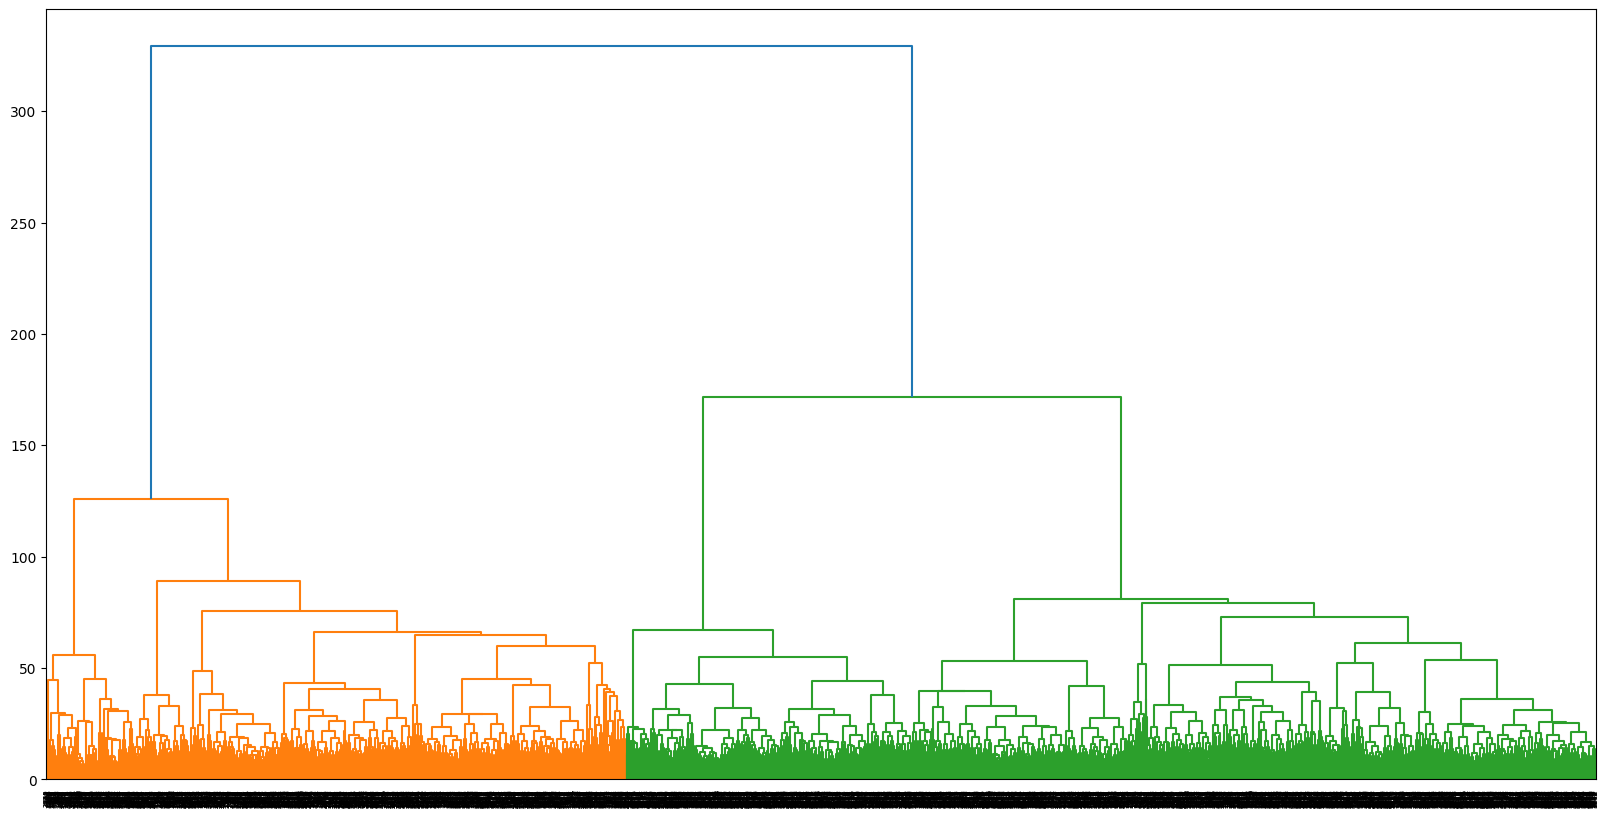

In [141]:
df = pd.DataFrame(df_sample).set_index('student_id')

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#show dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled, 'ward')

plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

In [142]:
# Apply K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [143]:
# Get the average values of each cluster and create a DataFrame
cluster_avg = df.groupby('Cluster').mean()
cluster_avg.head()

# Get foreach cluster 5 student_id that is the closest to the cluster average
closest_students = []
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    cluster_avg = cluster_data.mean()
    closest_students.extend(cluster_data.apply(lambda row: np.linalg.norm(row - cluster_avg), axis=1).nsmallest(5).index)

# Print the student_id's
print(closest_students)

# Print the student_id's with the clusters
print(df['Cluster'].loc[closest_students])


[6776, 1572, 6413, 284, 2147, 5230, 7206, 2998, 1439, 8038, 5886, 7027, 5521, 4828, 8029, 6525, 563, 8232, 9620, 6827]
student_id
6776    0
1572    0
6413    0
284     0
2147    0
5230    1
7206    1
2998    1
1439    1
8038    1
5886    2
7027    2
5521    2
4828    2
8029    2
6525    3
563     3
8232    3
9620    3
6827    3
Name: Cluster, dtype: int32


In [165]:
# Print row 6776
student_6776 = df.loc[6776]

# Convert to dataframe
df_student_6776 = pd.DataFrame(student_6776).T

# Drop the cluster column
df_student_6776 = df_student_6776.drop(['Cluster'], axis=1)

# Export to csv
df_student_6776.to_csv('./Demo/5 dot test/bin/Debug/test.csv', index=False)

In [166]:
df_student_6776.head()

,pauses,unique_patterns_count,total_values_count,duplicates,empty_submissions,Box_1_Submission,Box_2_Submission,Box_3_Submission,Box_4_Submission,Box_5_Submission,...,Box_9_Timegap,Box_10_Timegap,Box_11_Timegap,Box_12_Timegap,Box_13_Timegap,Box_14_Timegap,Box_15_Timegap,Box_16_Timegap,Box_17_Timegap,Box_18_Timegap
6776,7,16,16,0,0,0,0,0,1,2,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [147]:
# Print foreach cluster the amount of students
print(df['Cluster'].value_counts())

Cluster
2    1675
3    1330
1     875
0     649
Name: count, dtype: int64
